# Задание

+ Генерирование выборки для заданных функций с моделированием случайной ошибки измерения.

  Использовать библиотеки Python numpy, math, модуль matplotlib.pyplot.

  1. Сформировать выборку $\{(x^{(i)}, y^{(i)})\}^N_{i=1}$:

    $y^{(i)} = f(x^{(i)})+\varepsilon$, где $\varepsilon$ - ошибка, генерируемая случайно из заданного интервала $[-\varepsilon_0, +\varepsilon_0]$, $\varepsilon_0>0$

    Аргументы $x^{(i)}$ генерируется случайно в соответствии с равномерным распределением на интервале $[-1, 1]$.

    Варианты распределения ошибки на интервале $[-\varepsilon_0, +\varepsilon_0]$:
    
    + Ошибка $\varepsilon$ распределена равномерно
    + Ошибка $\varepsilon$ распределена нормально

    Варианты функции f:

    + $f=ax^3+bx^2+cx+d$,где a, b, c, d - случайные коэффициенты с интервала $[-3; 3]$
    + $f=xsin(2 \pi x)$

  2. Отобразить на координатной плоскости график функции f и выборку, полученную по ней. Выбрать разные варианты значения $\varepsilon_0$ и разные параметры нормального распределения.

+ Восстановление функциональной зависимости с помощью полиномиальной регрессии.

  Реализовать при помощи полиномиальной регрессии для полученной выборки восстановление функциональной зависимости, по которой была получена выборка. Привести примеры выборок и степеней полиномов, при которых:

    + происходит недообучение
    + происходит переобучение
    + полученная функциональная зависимость пригодна для прогнозирования значения восстанавливаемой функциональной зависимости в x, не содержащемся в выборке

  Использовать библиотеки Python numpy, math, scipy, модуль matplotlib.pyplot.

# Решение

1. Сгенерировать аргументы $\{x^{(i)}\}_1^N$:

In [13]:
import numpy as np

N = 10      # Размер выборки
min_x = -1  # Min значение аргумента выборки
max_x = 1   # Max значение аргумента выборки

x = np.random.uniform(min_x, max_x, N)

print(f'Аргументы x: {x}')

Аргументы x: [-0.81990705  0.69051474 -0.58745872 -0.05559206  0.30117128 -0.17466843
 -0.62059238 -0.82703166  0.8386459  -0.43717127]


2. Реализовать варианты функции f и варианты распределения ошибки $\varepsilon$:

In [14]:
import math as m

eps0 = 0.1          # Граница интервала значений ошибки
min_poly_coeff = -3 # Min значение коэффициентов функции полинома
max_poly_coeff = 3  # Max значение коэффициентов функции полинома

a = np.random.uniform(min_poly_coeff, max_poly_coeff)
b = np.random.uniform(min_poly_coeff, max_poly_coeff)
c = np.random.uniform(min_poly_coeff, max_poly_coeff)
d = np.random.uniform(min_poly_coeff, max_poly_coeff)
print(f'Полином f1: {a}*x^3 + {b}*x^2 + {c}*x + {d}')

def f1(x):
    return a*x**3 + b*x**2 + c*x + d

def f2(x):
    return x*m.sin(2*m.pi*x)

def uniform_eps():
    return np.random.uniform(-eps0, eps0)

def normal_eps():
    while True:
        eps = np.random.normal(0, eps0 / 3)
        if eps >= -eps0 and eps <= eps0:
            return eps

Полином f1: -2.180894958389459*x^3 + 1.256102346223983*x^2 + 2.69513524373757*x + -0.3682150785429976


3. Реализовать функцию для вычисления значений $\{y^{(i)}\}_i^N$:

In [15]:
def calc_y(x, f, eps):
    return np.vectorize(lambda x: f(x) + eps())(x)

4. Реализовать функцию для вычисления коэффициентов многочлена полиномиальной регрессии $\{\omega^{(i)}\}_0^M$:

In [16]:
import scipy.linalg as linalg

def calc_poly_reg_coeffs(x, y, M):
    A = np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i, j] = np.sum([x[k] ** (i + j) for k in range(N)])

    b = np.zeros((M+1, 1))
    for i in range(M+1):
        b[i][0] = np.sum([(y[k] * x[k] ** i) for k in range(N)])

    return linalg.solve(A, b)

5. Реализовал функцию для построения графика с оригинальной функцией, выборкой и многочленом полиномиальной регрессии:

In [17]:
import matplotlib.pyplot as plt

def create_graphic(ax, min_x, max_x, x, y, f, w):
    xx = np.arange(min_x, max_x, 0.001)
    orig_yy = np.vectorize(f)(xx)
    poly_yy = np.vectorize(lambda x: np.sum([(w[i] * x ** i) for i in range(w.size)]))(xx)

    ax.plot(xx, orig_yy, color='blue')
    ax.plot(xx, poly_yy, color='green')
    ax.scatter(x, y, marker='o', color='red', s=20)
    ax.grid(True)
    ax.set_ylim(np.min(orig_yy) - 0.1, np.max(orig_yy) + 0.1)

6. Произвести вычисления и построить графики для всех вариантов функций и распределений ошибок:

Значения y: [-0.5927739   1.46733584 -1.1587942  -0.43395179  0.57579779 -0.81699001
 -0.99839728 -0.51300996  1.56797138 -1.10403166]
Многочлен полиномиальной регрессии w: 0.05716299111298921x^0 + 1.523839883244531x^1

Значения y: [-0.55570263  1.33946965 -1.05439507 -0.49064874  0.46644689 -0.77329103
 -1.07291106 -0.50192788  1.52815885 -1.09210694]
Многочлен полиномиальной регрессии w: -0.37144250808503615x^0 + 2.6053980102503873x^1 + 1.2573717431191749x^2 + -2.0137424939915007x^3

Значения y: [-0.81180289 -0.72806819 -0.26791441 -0.0590217   0.36949903  0.14524052
 -0.46662629 -0.79710816 -0.72976165  0.07297751]
Многочлен полиномиальной регрессии w: -0.15680953676086823x^0 + -1.6111556598553465x^1 + 4.774731628881307x^2 + 27.64038107716768x^3 + 8.677678930656906x^4 + -81.88148035508357x^5 + -88.62934135029383x^6 + 65.06355968116017x^7 + 92.5390206351927x^8

Значения y: [-0.71374947 -0.69010559 -0.29110258  0.00755096  0.3127127   0.19066108
 -0.43987912 -0.73588934 -0.72988623  0

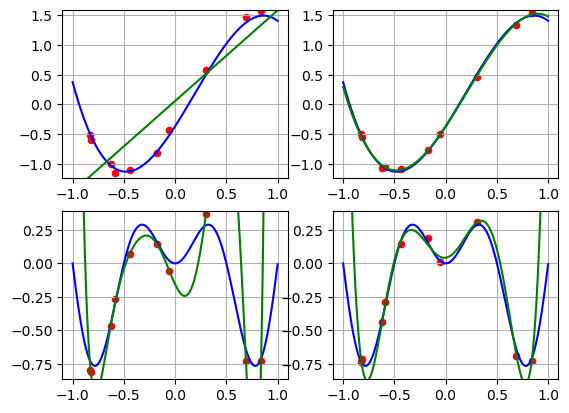

In [18]:
fig = plt.figure()
axs = fig.subplots(2, 2)

def calc_all(x, f, eps, M, ax):
    y = calc_y(x, f, eps)
    print(f'Значения y: {y}')

    w = calc_poly_reg_coeffs(x, y, M)
    print(f'Многочлен полиномиальной регрессии w: {" + ".join([f"{w[i][0]}x^{i}" for i in range(w.size)])}\n')

    create_graphic(ax, min_x, max_x, x, y, f, w)

calc_all(x, f1, uniform_eps, 1, axs[0,0])
calc_all(x, f1, normal_eps, 3, axs[0,1])
calc_all(x, f2, uniform_eps, 8, axs[1,0])
calc_all(x, f2, normal_eps, 6, axs[1,1])

plt.show()